In [13]:
% matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata 
mnist=fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [15]:
X,y=mnist["data"],mnist["target"]
print (X.shape,y.shape)

(70000, 784) (70000,)


5.0


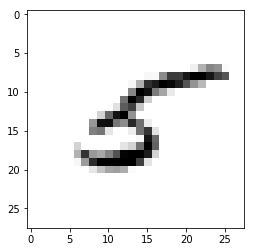

In [16]:
some_digit=X[66000]
some_digit_image=some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary)
#plt.axis("off")
print (y[66000])

In [10]:
def plot_digit(data):
    image=data.reshape(28,28)
    plt.imshow(image,cmap=matplotlib.cm.binarty)
    plt.axis('off')

In [11]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

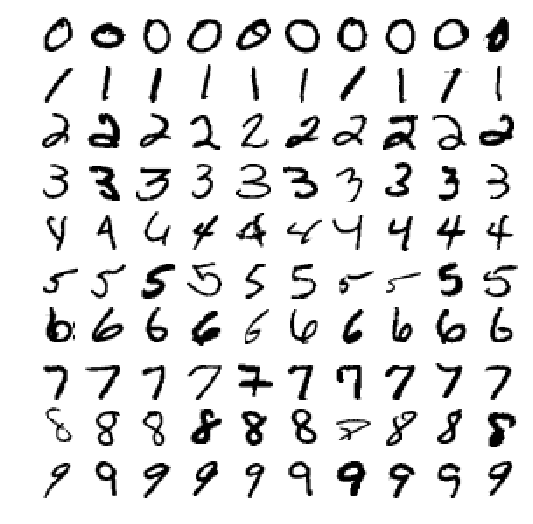

In [17]:
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
plt.show()

In [19]:
# Create test set and set it aside 
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

In [20]:
shuffle_index=np.random.permutation(60000)
X_train, y_train=X_train[shuffle_index], y_train[shuffle_index]

In [21]:
# Lets make binary classifier 1st

y_train_5=(y_train==5)
y_test_5=(y_test==5)

In [22]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

/home/vineet/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [23]:
sgd_clf.predict([some_digit])

array([ True], dtype=bool)

In [24]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train, y_train_5,cv=3, scoring="accuracy")

/home/vineet/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/vineet/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self),

array([ 0.85592881,  0.86559328,  0.85782867])

In [25]:
# Lets calculate accuracy using a dumb classifier
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

In [26]:
n5clf=Never5Classifier()
cross_val_score(n5clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([ 0.9127 ,  0.90565,  0.9106 ])

In [29]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(sgd_clf,X_train, y_train_5,cv=3)

/home/vineet/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/vineet/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self),

In [30]:
# performance measure
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[54090,   489],
       [ 1826,  3595]])

In [31]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)
print('model seems not v accurate')

0.75644397685428721

In [32]:
# Multinomial classification, read page 96(important)

# Using binary classifier
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])

/home/vineet/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([ 5.])

In [33]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-288926.77449638, -211021.30938718, -136557.90234864,
        -305297.39584692,  -80920.60698206,   85654.37430618,
        -369471.15141914, -179157.05460632, -190292.95102463,
        -163330.76231064]])

In [38]:
print (np.argmax(some_digit_scores),'\n classifier stores classes and its attribute \n',sgd_clf.classes_)

5 
 classifier stores classes and its attribute 
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]


In [40]:
# Using multi-nomial classifier
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train,y_train)
forest_clf.predict([some_digit])

array([ 5.])

In [41]:
forest_clf.predict_proba([some_digit])

array([[ 0. ,  0.1,  0.1,  0. ,  0. ,  0.8,  0. ,  0. ,  0. ,  0. ]])

In [42]:
# Now lets evaluate our model
cross_val_score(sgd_clf,X_train, y_train, cv=3, scoring='accuracy')

/home/vineet/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/vineet/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self),

array([ 0.85592881,  0.86559328,  0.85782867])

In [44]:
# lets check accuracy after scaling the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

/home/vineet/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/vineet/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self),

array([ 0.90896821,  0.90939547,  0.91048657])

In [45]:
# Now lets get confusion matrix, need to run predict first.
y_train_pred=cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mat=confusion_matrix(y_train, y_train_pred)
conf_mat


/home/vineet/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/vineet/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self),

array([[5728,    3,   25,   11,   11,   49,   46,    8,   39,    3],
       [   2, 6462,   50,   26,    7,   41,    5,   13,  124,   12],
       [  56,   37, 5337,   92,   79,   23,   90,   59,  169,   16],
       [  50,   39,  139, 5350,    3,  224,   33,   57,  141,   95],
       [  23,   26,   38,    9, 5346,   10,   52,   36,   87,  215],
       [  66,   39,   37,  189,   65, 4622,  110,   29,  178,   86],
       [  31,   23,   51,    2,   42,   86, 5629,    7,   47,    0],
       [  25,   21,   60,   32,   61,   10,    5, 5817,   15,  219],
       [  51,  151,   72,  159,   15,  167,   57,   23, 5021,  135],
       [  41,   32,   29,   89,  169,   35,    2,  208,   79, 5265]])

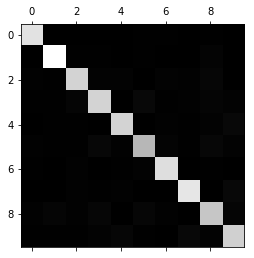

In [46]:
plt.matshow(conf_mat,cmap=plt.cm.gray)

In [50]:
# Divide each value in conf matrix by no. of images in each class
row_sums=conf_mat.sum(axis=1, keepdims=True)
norm_conf_mat=conf_mat/row_sums

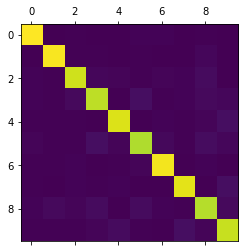

In [51]:
plt.matshow(norm_conf_mat,0)

In [ ]:
# Stopped here, multilabel and multiouput classification to be done